<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/2-Deep-Neural-Networks/2_5_Bias_Variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr>
<h1 align="center"><a href='https://shangeth.com/courses/'>Deep Learning - Beginners Track</a></h1>
<h3 align="center">Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3>
<hr>

# Bias & Variance

Let us train a DNN model for a simple regression problem.

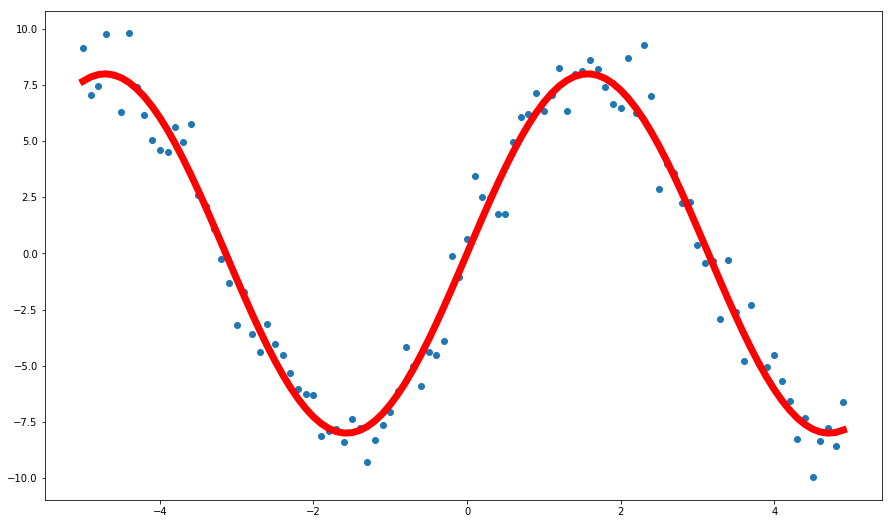

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def dataset(show=True):
    X = np.arange(-5, 5, 0.01)
    y = 8 * np.sin(X) + np.random.randn(1000)
    if show:
        yy = 8 * np.sin(X)
        plt.figure(figsize=(15,9))
        plt.scatter(X, y)
        plt.plot(X, yy, color='red', linewidth=7)
        plt.show()
    return X, y

X, y = dataset(show=True)


Lets train 2 models for this dataset

- a very simple linear model
- a very complex DNN model

## Simple Linear Model

 We are going to split the dataset into 5 groups(random shuffle) and use each of that 5 groups to train 5 different linear models. We will use sklearn's StratifiedKFold to split the dataset into 5. Check the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).

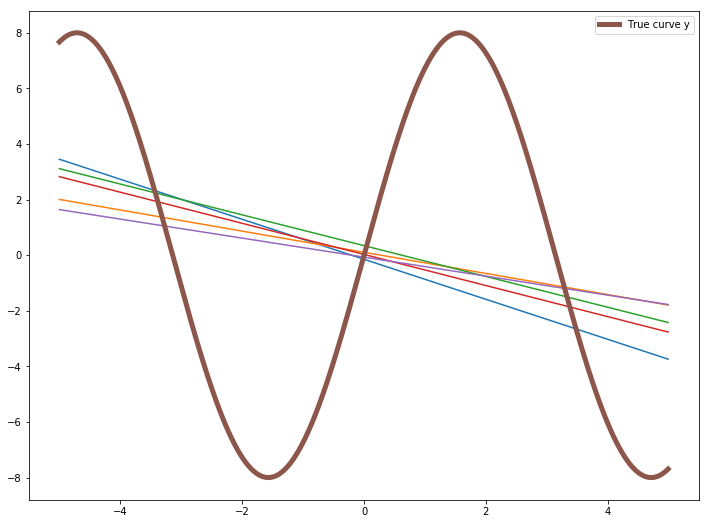

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()
import random

predictions = []
for i in range(5):
    idx = random.choices(np.arange(1000), k=700)
    X_train, y_train = X[idx], y[idx]

    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1]) ])
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    tf_history = model.fit(X_train, y_train, batch_size=100, epochs=200, verbose=False)

    prediction = model.predict(X)
    predictions.append(prediction)


plt.figure(figsize=(12,9))
plt.plot(X, predictions[0])
plt.plot(X, predictions[1])
plt.plot(X, predictions[2])
plt.plot(X, predictions[3])
plt.plot(X, predictions[4])
plt.plot(X, 8 * np.sin(X), linewidth=5, label='True curve y')
plt.legend()
plt.show()

## Deep Neural Network model

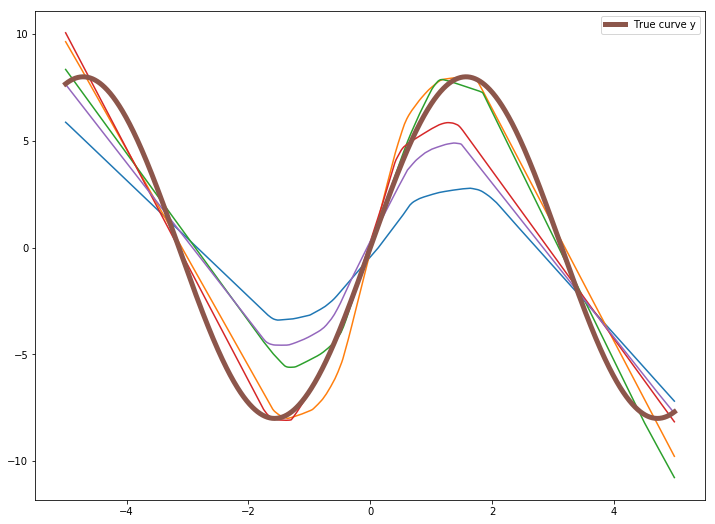

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()
import random

predictions = []
for i in range(5):
    idx = random.choices(np.arange(1000), k=100)
    X_train, y_train = X[idx], y[idx]

    model = tf.keras.Sequential([
                             keras.layers.Dense(units=50, input_shape=[1]), 
                             keras.layers.Activation('relu'),
                             keras.layers.Dense(units=50),
                             keras.layers.Activation('relu'),
                             keras.layers.Dense(units=1), 
                             ])
    
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    tf_history = model.fit(X_train, y_train, batch_size=100, epochs=200, verbose=False)

    prediction = model.predict(X)
    predictions.append(prediction)


plt.figure(figsize=(12,9))
plt.plot(X, predictions[0])
plt.plot(X, predictions[1])
plt.plot(X, predictions[2])
plt.plot(X, predictions[3])
plt.plot(X, predictions[4])
plt.plot(X, 8 * np.sin(X), linewidth=5, label='True curve y')
plt.legend()
plt.show()

## Bias 

Bias is defined as $ Bias = E[\hat{y}] - y$

It is the difference between the expected value of prediction and the true curve. The expected value will be calculated by splitting the data into n parts and training n model on those n data parts and average of that n model prediction will be expected value. 

You can see the bias for first model will be very high as the model predicts a straight line, but the true curve is sinusoidal. But the bias for 2nd model will be lower than 1st model.


## Variance

Variance as you should know defines how much a data is varying. 
$Variance(\hat{y})  = E[(\hat{y} - E[\hat{y}])^2]$
Although the predictions are not good, but the variance of 2nd model will be higher than 1st model, as the 2nd comple model will try to fit the data more.


| Model              	| Bias 	| Variance 	|
|--------------------	|------	|----------	|
| Simple Model       	| High 	| Low      	|
| Very Complex model 	| Low  	| High     	|

# Bias-Variance Tradeoff

Let's do some math first and discuss about it.

## Bias-Variance Decomposition
$MSE = E[(y - \hat{y})^2] = E[y^2 - 2.y.\hat{y} + \hat{y}^2]$

here the random variable is $\hat{y}$ as it is dependent on $X$.

$ MSE = y^2 - 2.y.E[\hat{y}] + E[\hat{y}^2]$

$Bias = E[\hat{y}] - y$

$Bias^2 = (E[\hat{y}] - y)^2 = E[\hat{y}]^2 + y^2 - 2yE[\hat{y}]$

$Variance = E[(\hat{y} - E[\hat{y}])^2] = = E[\hat{y}^2] + E[\hat{y}]^2 - 2E[\hat{y} E[\hat{y}]] = E[\hat{y}^2] + E[\hat{y}]^2 - 2E[\hat{y}]^2 = E[\hat{y}^2] - E[\hat{y}]^2$

$Bias^2 + Variance  = y^2 - 2.y.E[\hat{y}] + E[\hat{y}^2] = MSE$

$Bias^2 + Variance  = MSE$

- when the bias is high(Simple Model), MSE is high, We don't want high Loss, so **we don't want high bias**
- when the variance is high(complex model), again MSE is high, so **we don't want high variance**

Conclusion is we need to choose a model which doesn't have high bias or high variance, somthing optimal bias-variance in between will do good.

![](http://scott.fortmann-roe.com/docs/docs/MeasuringError/ModelError.png)

[Image Source](http://scott.fortmann-roe.com)

# Underfitting

When a model have high bias, then the model is **"Underfitting"**. 
Let's see an example first

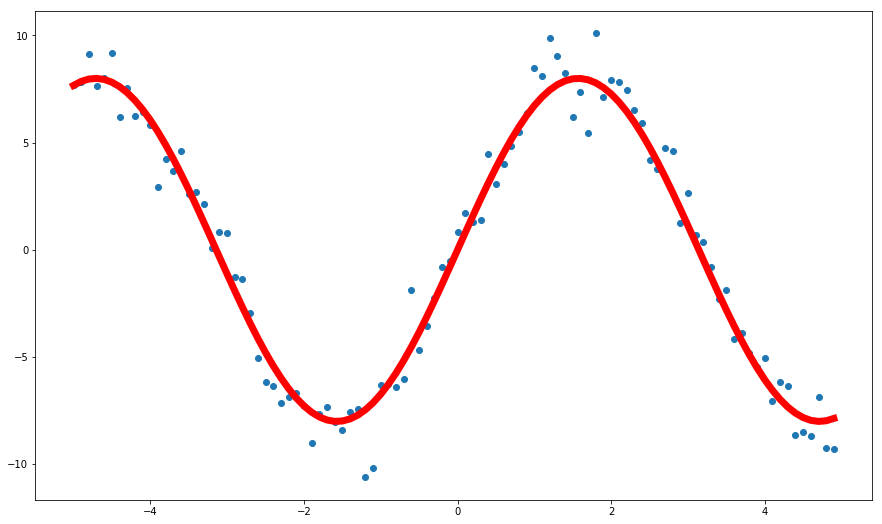

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def dataset(show=True):
    X = np.arange(-5, 5, 0.1)
    y = 8 * np.sin(X) + np.random.randn(100)
    if show:
        yy = 8 * np.sin(X)
        plt.figure(figsize=(15,9))
        plt.scatter(X, y)
        plt.plot(X, yy, color='red', linewidth=7)
        plt.show()
    return X, y

X, y = dataset(show=True)


Train on 70 samples, validate on 30 samples
Epoch 1/200
70/70 [==============================] - 0s 1ms/sample - loss: 33.6902 - val_loss: 41.1840
Epoch 2/200
70/70 [==============================] - 0s 57us/sample - loss: 33.6857 - val_loss: 41.1832
Epoch 3/200
70/70 [==============================] - 0s 51us/sample - loss: 33.6812 - val_loss: 41.1824
Epoch 4/200
70/70 [==============================] - 0s 44us/sample - loss: 33.6767 - val_loss: 41.1816
Epoch 5/200
70/70 [==============================] - 0s 43us/sample - loss: 33.6723 - val_loss: 41.1809
Epoch 6/200
70/70 [==============================] - 0s 46us/sample - loss: 33.6678 - val_loss: 41.1802
Epoch 7/200
70/70 [==============================] - 0s 44us/sample - loss: 33.6634 - val_loss: 41.1795
Epoch 8/200
70/70 [==============================] - 0s 46us/sample - loss: 33.6590 - val_loss: 41.1788
Epoch 9/200
70/70 [==============================] - 0s 47us/sample - loss: 33.6547 - val_loss: 41.1781
Epoch 10/200
70/70 [=

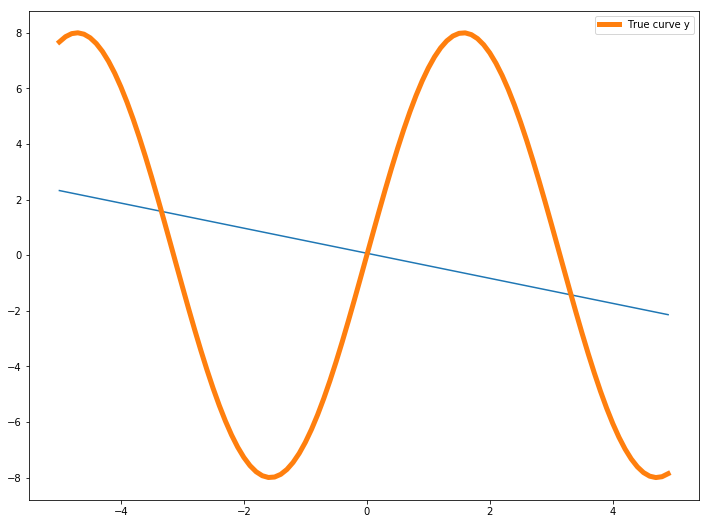

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1]) ])
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_train, y_train, batch_size=100, epochs=200, verbose=True, validation_data=(X_test, y_test))

prediction = model.predict(X)

plt.figure(figsize=(12,9))
plt.plot(X, prediction)

plt.plot(X, 8 * np.sin(X), linewidth=5, label='True curve y')
plt.legend()
plt.show()

You can see the Training data loss and Validation data loss both are bad, the model performance is not good. This is called Underfitting.

Underfitting may happen because the model is not complex enough, or need more training. So, using a deeper network or training for more time may help.

# Overfitting

Let's train a more complex model with less training data.

Train on 10 samples, validate on 90 samples
Epoch 1/1000
10/10 [==============================] - 0s 14ms/sample - loss: 31.7417 - val_loss: 37.6045
Epoch 2/1000
10/10 [==============================] - 0s 587us/sample - loss: 31.0950 - val_loss: 37.4865
Epoch 3/1000
10/10 [==============================] - 0s 474us/sample - loss: 30.5526 - val_loss: 37.3842
Epoch 4/1000
10/10 [==============================] - 0s 465us/sample - loss: 30.0411 - val_loss: 37.2929
Epoch 5/1000
10/10 [==============================] - 0s 408us/sample - loss: 29.5543 - val_loss: 37.2139
Epoch 6/1000
10/10 [==============================] - 0s 501us/sample - loss: 29.0897 - val_loss: 37.1441
Epoch 7/1000
10/10 [==============================] - 0s 520us/sample - loss: 28.6401 - val_loss: 37.0817
Epoch 8/1000
10/10 [==============================] - 0s 402us/sample - loss: 28.2044 - val_loss: 37.0266
Epoch 9/1000
10/10 [==============================] - 0s 420us/sample - loss: 27.7828 - val_loss: 36.9769
Epo

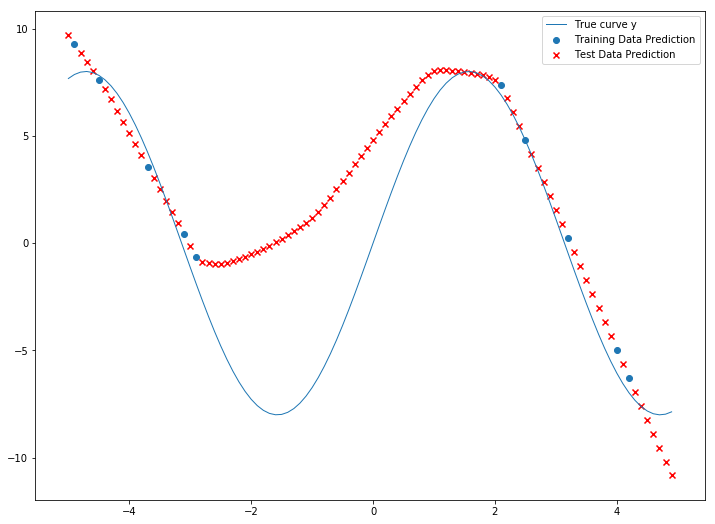

In [33]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tf.keras.backend.clear_session()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, shuffle=True)

model = tf.keras.Sequential([
                             keras.layers.Dense(units=50, input_shape=[1]), 
                             keras.layers.Activation('relu'),
                             keras.layers.Dense(units=50),
                             keras.layers.Activation('relu'),
                             keras.layers.Dense(units=1), 
                             ])

optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
tf_history = model.fit(X_train, y_train, batch_size=100, epochs=1000, verbose=True, validation_data=(X_test, y_test))

prediction = model.predict(X_train)

plt.figure(figsize=(12,9))
plt.scatter(X_train, prediction,label='Training Data Prediction')
plt.scatter(X_test, model.predict(X_test), color='r', marker='x', label='Test Data Prediction')

plt.plot(X, 8 * np.sin(X), linewidth=1, label='True curve y')
plt.legend()
plt.show()

Here you can see, although the model is comple and can learn more complex featreus of the data, the Validation loss is way higher than training loss. This is called Overfitting. This means the model fits the training data so much that it does not generalize and perform very poor in new unseen data. Adding more data can help to prevent overfitting.